**Exploratory Data Analysis with Pandas**

**Allison Lee**

This is an exercise I have done to demonstrate EDA with Pandas on a simple "coffee" dataset. The dataset contains individuals' rankings of several different coffee shops. This notebook explores the data, deals with missing values, and does some preliminary visualization. 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we import the dataset, and then take a look at head and tail to make sure the data loaded correctly.

In [111]:
coffee=pd.read_csv('datasets/coffee-preferences.csv')

In [112]:
coffee.head()

,Timestamp,Name,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,CaffeTrieste,GrandCoffee,RitualCoffee,FourBarrel,WorkshopCafe
0,3/17/2015 18:37:58,Alison,3,5,4.0,3.0,NaN,NaN,5.0,5.0,NaN
1,3/17/2015 18:38:09,April,4,5,5.0,3.0,NaN,NaN,3.0,NaN,5.0
2,3/17/2015 18:38:25,Vijay,3,5,5.0,5.0,3.0,2.0,1.0,1.0,1.0
3,3/17/2015 18:38:28,Vanessa,1,5,5.0,2.0,NaN,NaN,3.0,2.0,3.0
4,3/17/2015 18:38:46,Isabel,1,4,4.0,2.0,4.0,NaN,4.0,4.0,NaN


In [93]:
coffee.tail()

,Timestamp,Name,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,CaffeTrieste,GrandCoffee,RitualCoffee,FourBarrel,WorkshopCafe
15,3/17/2015 18:40:49,Markus,3,5,NaN,3.0,NaN,NaN,4.0,NaN,NaN
16,3/17/2015 18:41:18,Otto,4,2,2.0,5.0,NaN,NaN,3.0,3.0,3.0
17,3/17/2015 18:41:23,Alessandro,1,5,3.0,2.0,NaN,NaN,4.0,3.0,NaN
18,3/17/2015 18:41:35,Rocky,3,5,4.0,3.0,3.0,3.0,4.0,4.0,3.0
19,3/17/2015 18:42:01,Cheong-tseng,3,1,NaN,NaN,NaN,NaN,4.0,NaN,NaN


On first glance, it appears this is a relatively simple and small dataset, and the biggest challenge will be 
deciding what to do with the null values. We see from below that there are only 20 rows, or 19 rows of respondent data points--a very small sample. From columns, we can see that nine coffee shops were evaluated. The **objective** of this analysis is to understand which coffee shop was ranked the most popular, and which the least, given this data. 

In [94]:
coffee.shape

(20, 11)

In [95]:
coffee.columns

Index(['Timestamp', 'Name', 'Starbucks', 'PhilzCoffee', 'BlueBottleCoffee',
       'PeetsTea', 'CaffeTrieste', 'GrandCoffee', 'RitualCoffee', 'FourBarrel',
       'WorkshopCafe'],
      dtype='object')

The index is set as numerical values from 0 to 20. 

In [96]:
coffee.index

RangeIndex(start=0, stop=20, step=1)

Let's drop the "Timestamp" column, as it's not particularly useful for our analysis... 

In [113]:
coffee=coffee.drop(labels='Timestamp', axis=1)

...and let's reset the index to the "Name" column. 

In [114]:
coffee.set_index('Name', inplace=True)

Taking a look at the datatypes of the columns: It's interesting that some of the columns are integers and some are floats. Below, let's change Starbucks and Philz to floats as well. We can do this by changing the entire dataframe to floats. 

In [22]:
coffee.dtypes

Starbucks             int64
PhilzCoffee           int64
BlueBottleCoffee    float64
PeetsTea            float64
CaffeTrieste        float64
GrandCoffee         float64
RitualCoffee        float64
FourBarrel          float64
WorkshopCafe        float64
dtype: object

In [115]:
coffee = coffee.astype('float')

In [100]:
coffee.dtypes

Starbucks           float64
PhilzCoffee         float64
BlueBottleCoffee    float64
PeetsTea            float64
CaffeTrieste        float64
GrandCoffee         float64
RitualCoffee        float64
FourBarrel          float64
WorkshopCafe        float64
dtype: object

Now, let's take a look at and tackle the null values. At first glance, we can see there appear to be a significant amount of null values in the dataset. 

In [101]:
coffee.isnull()

,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,CaffeTrieste,GrandCoffee,RitualCoffee,FourBarrel,WorkshopCafe
Name,,,,,,,,,
Alison,False,False,False,False,True,True,False,False,True
April,False,False,False,False,True,True,False,True,False
Vijay,False,False,False,False,False,False,False,False,False
Vanessa,False,False,False,False,True,True,False,False,False
Isabel,False,False,False,False,False,True,False,False,True
India,False,False,False,False,False,False,True,True,False
Dave H,False,False,True,False,True,True,True,True,True
Deepthi,False,False,True,False,True,True,True,True,False
Ramesh,False,False,True,False,True,True,True,True,False


In [129]:
coffee.isnull().sum()

Starbucks            0
PhilzCoffee          0
BlueBottleCoffee     6
PeetsTea             1
CaffeTrieste        12
GrandCoffee         15
RitualCoffee         7
FourBarrel          10
WorkshopCafe         8
dtype: int64

Given that we only have 20 rows (19 respondents). So 15, 12 and 10 (GrandCoffee, CaffeTrieste and FourBarrel) are a signficant number of missing datapoints to justify dropping those columns. Let's save the revised data to "coffee2".

In [151]:
coffee2=coffee.drop(columns=['CaffeTrieste', 'GrandCoffee', 'FourBarrel'])

Let's take a look at the number of nulls again, this time by row. There are three respondents who have a count of 3 missing values each. Given that the sample is so small to begin with, I will opt to fill in the missing data with median values rather than delete these rows. I will also approach the remaining missing values in the columns in the same way. I'm choosing median values as opposed to 0, which could skew the rankings lower than intended, or averages, which are sensitive to outliers and could distort the rankings as well.  

In [152]:
coffee2.isnull().sum(axis=1)

Name
Alison          1
April           0
Vijay           0
Vanessa         0
Isabel          1
India           1
Dave H          3
Deepthi         2
Ramesh          2
Hugh            0
Alex            3
Ajay Anand      2
David Feng      0
Zach            1
Matt            0
Markus          2
Otto            0
Alessandro      1
Rocky           0
Cheong-tseng    3
dtype: int64

In [153]:
coffee2.isnull().sum()

Starbucks           0
PhilzCoffee         0
BlueBottleCoffee    6
PeetsTea            1
RitualCoffee        7
WorkshopCafe        8
dtype: int64

We replace all the remaining missing values with the median of that respective column using fillna.

In [154]:
coffee2=coffee2.fillna(value={'BlueBottleCoffee':coffee2['BlueBottleCoffee'].median(), 'PeetsTea':coffee2['PeetsTea'].median(),'RitualCoffee':coffee2['RitualCoffee'].median(), 'WorkshopCafe':coffee2['WorkshopCafe'].median()})

Now that we have addressed the missing values, we can start to analyze the data. 

In [155]:
coffee2.describe()

,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,RitualCoffee,WorkshopCafe
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.850000,4.250000,4.000000,3.100000,3.850000,2.950000
std,1.136708,1.164158,0.725476,0.967906,0.875094,0.998683
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,2.750000,4.000000,4.000000,2.750000,4.000000,3.000000
50%,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000
75%,3.250000,5.000000,4.000000,3.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Looking at the summary statistics, we see Philz is the leader both in terms of average ranking and in terms of median ranking, followed by BlueBottle and Ritual. On average, Starbucks has the lowest ranking. The standard deviations are highest for Starbucks and Philz, indicating that the datapoints have a greater spread (i.e. greater distances from the mean, or in other words, more spread out rankings from respondents). 

We use three graphs to illustrate the key points of our analysis:

**1. Average Ranking of Coffee Shops**

This graph gives a clear picture of the highest and lowest ranked coffee shops in our cleaned dataset. 

**2. Boxplot Showing Spread of Opinions**

This graph doesn't end up being visually appealing, and neither does it convey a clear message other than rankings show a large spread for all of the coffee shops. 

**3. Number of Respondents per Coffee Shop, before Null Replacements**

This graph just serves to show the readers the content of the original dataset, to justify why we ended up excluding the three shops with the fewest number of respondents from our analysis. 

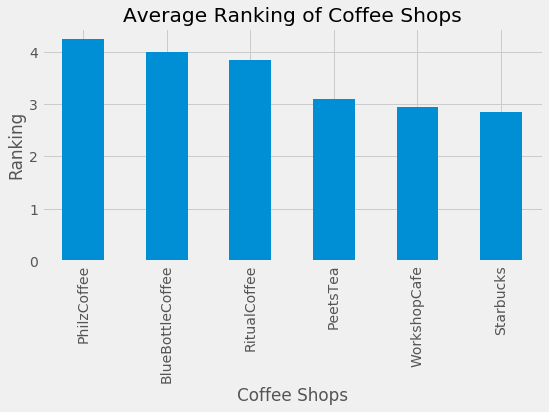

In [156]:
coffee2.mean().sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title="Average Ranking of Coffee Shops")
plt.xlabel("Coffee Shops")
plt.ylabel("Ranking")
plt.style.use('fivethirtyeight')

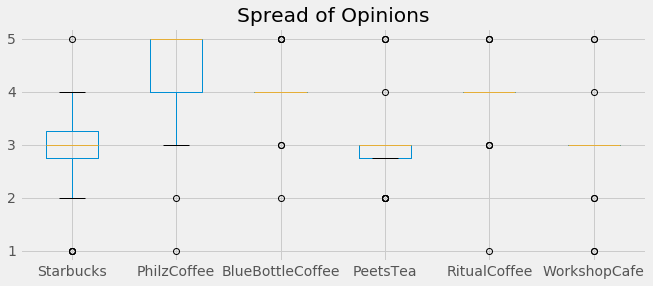

In [157]:
coffee2.plot(kind='box', figsize=(10,4), title="Spread of Opinions")

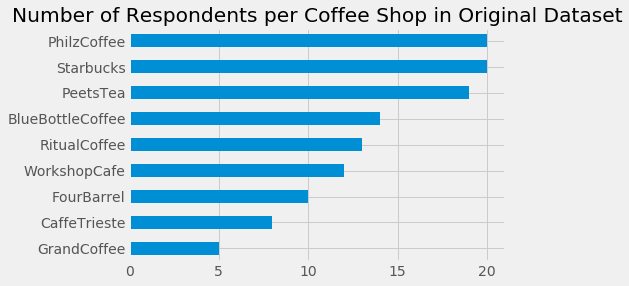

In [161]:
coffee.count().sort_values().plot(kind='barh', title="Number of Respondents per Coffee Shop in Original Dataset")